In [8]:
# Setting up the csv and the imports needed for the project
# Referenced this page for more information about the data set: https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html
import pandas as pd
import numpy as np

kc_house_data = pd.read_csv("kc_house_data.csv") # Please note: I changed the name of the csv to eliminate the need for spaces in the document's title
kc_house_data.head(5) # using this command to view the column names before diving into the questions

# Begin work for final here
# For all of the problems, I referenced the following: https://docs.google.com/document/d/1gXe5EihuuXvxtaVqa1DNLbcMdEfODUVWn2K2H8rbrbQ/edit
# https://docs.google.com/document/d/15EII2bg-ePbPaQe8dlMJhJZeUJ6JIRIlKwv_FJq5zMM/edit
# https://docs.google.com/document/d/1ybiO57YCCFe1IikjtqioffPScYWUXcJEUUqhgQRnLsw/edit


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
#Question 1: What is the mean home price in King County?
mean_price = kc_house_data["price"].mean()
print(mean_price)

540088.1417665294


In [10]:
# Question 2: What is the total number of bathrooms in the zip code 98178?
specific_zip = kc_house_data[kc_house_data["zipcode"] == 98178]
specific_zip["bathrooms"].sum()

453.75

In [11]:
# Question 3: What was the zip code with the most expensive home?
max_price = kc_house_data["price"].max()
zip_most_expensive_house = kc_house_data[kc_house_data["price"] == max_price]
zip_most_expensive_house["zipcode"]

7252    98102
Name: zipcode, dtype: int64

In [12]:
# Question 4: What is the year built for the home with id 2414600126?
specific_id = kc_house_data[kc_house_data["id"] == 2414600126]
specific_id["yr_built"]

8    1960
Name: yr_built, dtype: int64

In [13]:
#Question 5: What is the correlation between sqft_living and price?
# referenced this for info on correlation coefficients: https://magoosh.com/statistics/pearson-correlation-coefficient/
# also referenced: https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf
kc_house_data[['sqft_living', 'price']].corr()

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


<AxesSubplot:xlabel='yr_built', ylabel='zipcode'>

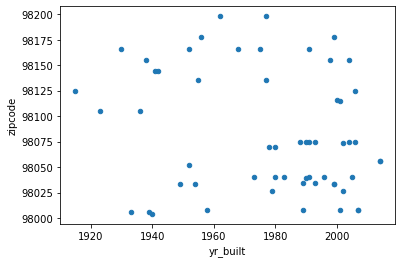

In [14]:
# My original Question (1): Which houses have a view of 1 or more, sqft_living greater than or equal to 1300, >= 3 bathrooms, and are on the waterfront? 
# Find out the answer to the above question and create a scatter plot with the yr_built and zipcode as the x and y axes respectively.
kc_view = kc_house_data[kc_house_data["view"] >= 1]
kc_sqft = kc_view[kc_view["sqft_living"] >= 1300]
kc_br = kc_sqft[kc_sqft["bathrooms"] >= 3]
kc_wf = kc_br[kc_br["waterfront"] == 1]

kc_wf.plot.scatter(x = "yr_built", y = "zipcode")

<AxesSubplot:xlabel='sqft_living', ylabel='sqft_lot'>

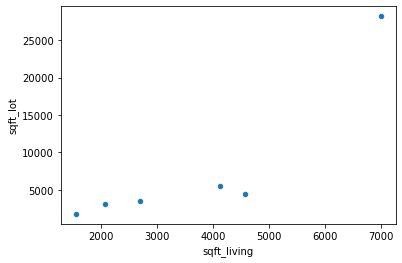

In [15]:
# My original Question (2): It looks like there may be an interesting trend in the above graph in the zipcode 98075. Is there a plot-able relationship between the sqft_lot and sqft_living of the houses that meet the criteria from "Original Question (1)?"

# Find out on a scatter plot where each of the houses that meet the above criteria from "My original Question (1)" AND are in the zipcode 98075 are in terms of sqft_living (x-axis) and sqft_lot (y-axis).

# Posting in the code from the previous variable definitions in (1):  
kc_view = kc_house_data[kc_house_data["view"] >= 1]
kc_sqft = kc_view[kc_view["sqft_living"] >= 1300]
kc_br = kc_sqft[kc_sqft["bathrooms"] >= 3]
kc_wf = kc_br[kc_br["waterfront"] == 1]

# Finally, the code to figure out the answer to my 2nd question:
kc_zip3 = kc_wf[kc_wf['zipcode'] == 98075]
kc_zip3.plot.scatter(x = "sqft_living", y = "sqft_lot")

<AxesSubplot:xlabel='sqft_living', ylabel='sqft_lot'>

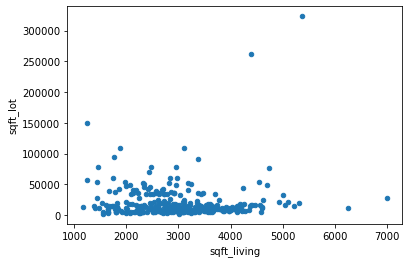

In [17]:
# For a point of Comparison, let's plot the house data for all of the houses listed in the data set for the zip code 98075.
kc_zip2 = kc_house_data[kc_house_data["zipcode"] == 98075]
kc_zip2.plot.scatter(x = "sqft_living", y = "sqft_lot")